<a href="https://colab.research.google.com/github/poronita/Stock-Price-Analysis/blob/main/Stock_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
# Load the data
file_path = "/content/BBNI.JK.csv"
stock_data = pd.read_csv(file_path)

In [42]:
# Convert 'Date' to datetime and set as index
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

In [43]:
# Filtering data to only include data after January 2019
stock_data = stock_data[stock_data.index >= '2019-01-01']

In [44]:
# EDA: Descriptive Statistics
print("Descriptive Statistics:\n", stock_data.describe())

Descriptive Statistics:
               Open         High          Low        Close    Adj Close  \
count  1236.000000  1236.000000  1236.000000  1236.000000  1236.000000   
mean   3759.219256  3801.931634  3710.538026  3755.495550  3346.020655   
std     907.009778   908.398375   906.685182   908.494524   926.387166   
min    1580.000000  1705.000000  1485.000000  1580.000000  1375.536499   
25%    3000.000000  3050.000000  2950.000000  2987.500000  2611.778320   
50%    3900.000000  3943.750000  3862.500000  3887.500000  3291.803711   
75%    4512.500000  4553.125000  4475.000000  4512.500000  4082.027100   
max    5675.000000  5750.000000  5575.000000  5600.000000  5600.000000   

             Volume  
count  1.236000e+03  
mean   6.717297e+07  
std    5.229781e+07  
min    0.000000e+00  
25%    3.545830e+07  
50%    5.149520e+07  
75%    8.184455e+07  
max    4.440854e+08  


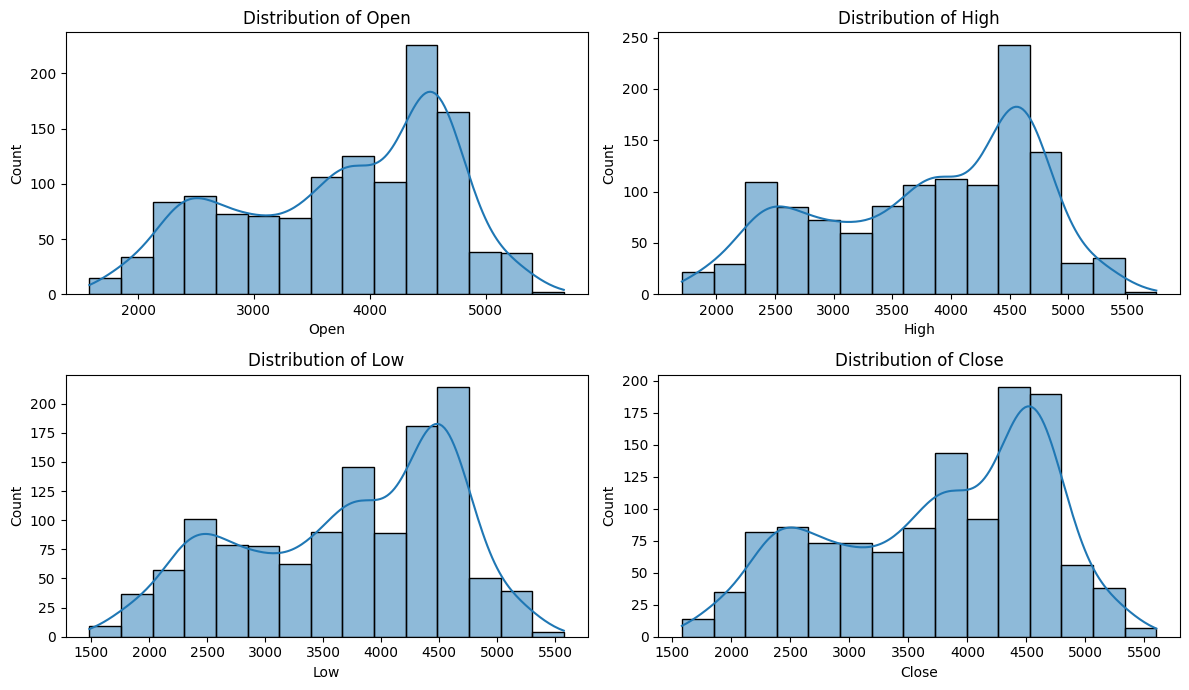

In [45]:
# EDA: Distribution of Key Metrics
plt.figure(figsize=(12, 7))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(stock_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

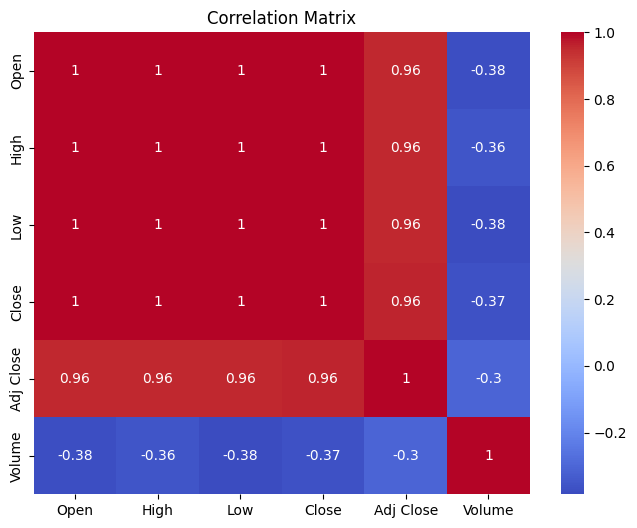

In [46]:
# EDA: Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

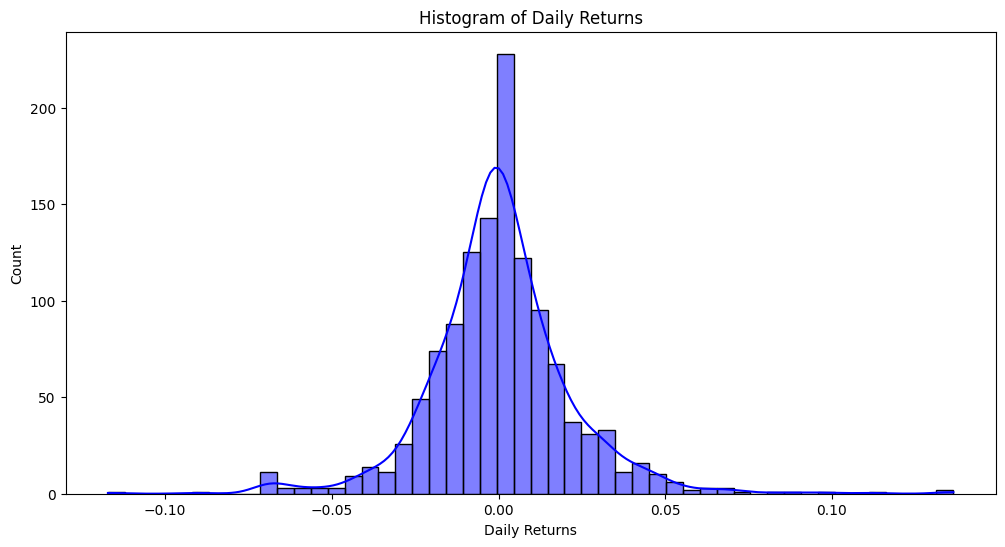

In [47]:
# EDA: Daily Returns Analysis
stock_data['Daily Returns'] = stock_data['Close'].pct_change()
plt.figure(figsize=(12, 6))
sns.histplot(stock_data['Daily Returns'].dropna(), bins=50, kde=True, color='blue')
plt.title('Histogram of Daily Returns')
plt.show()

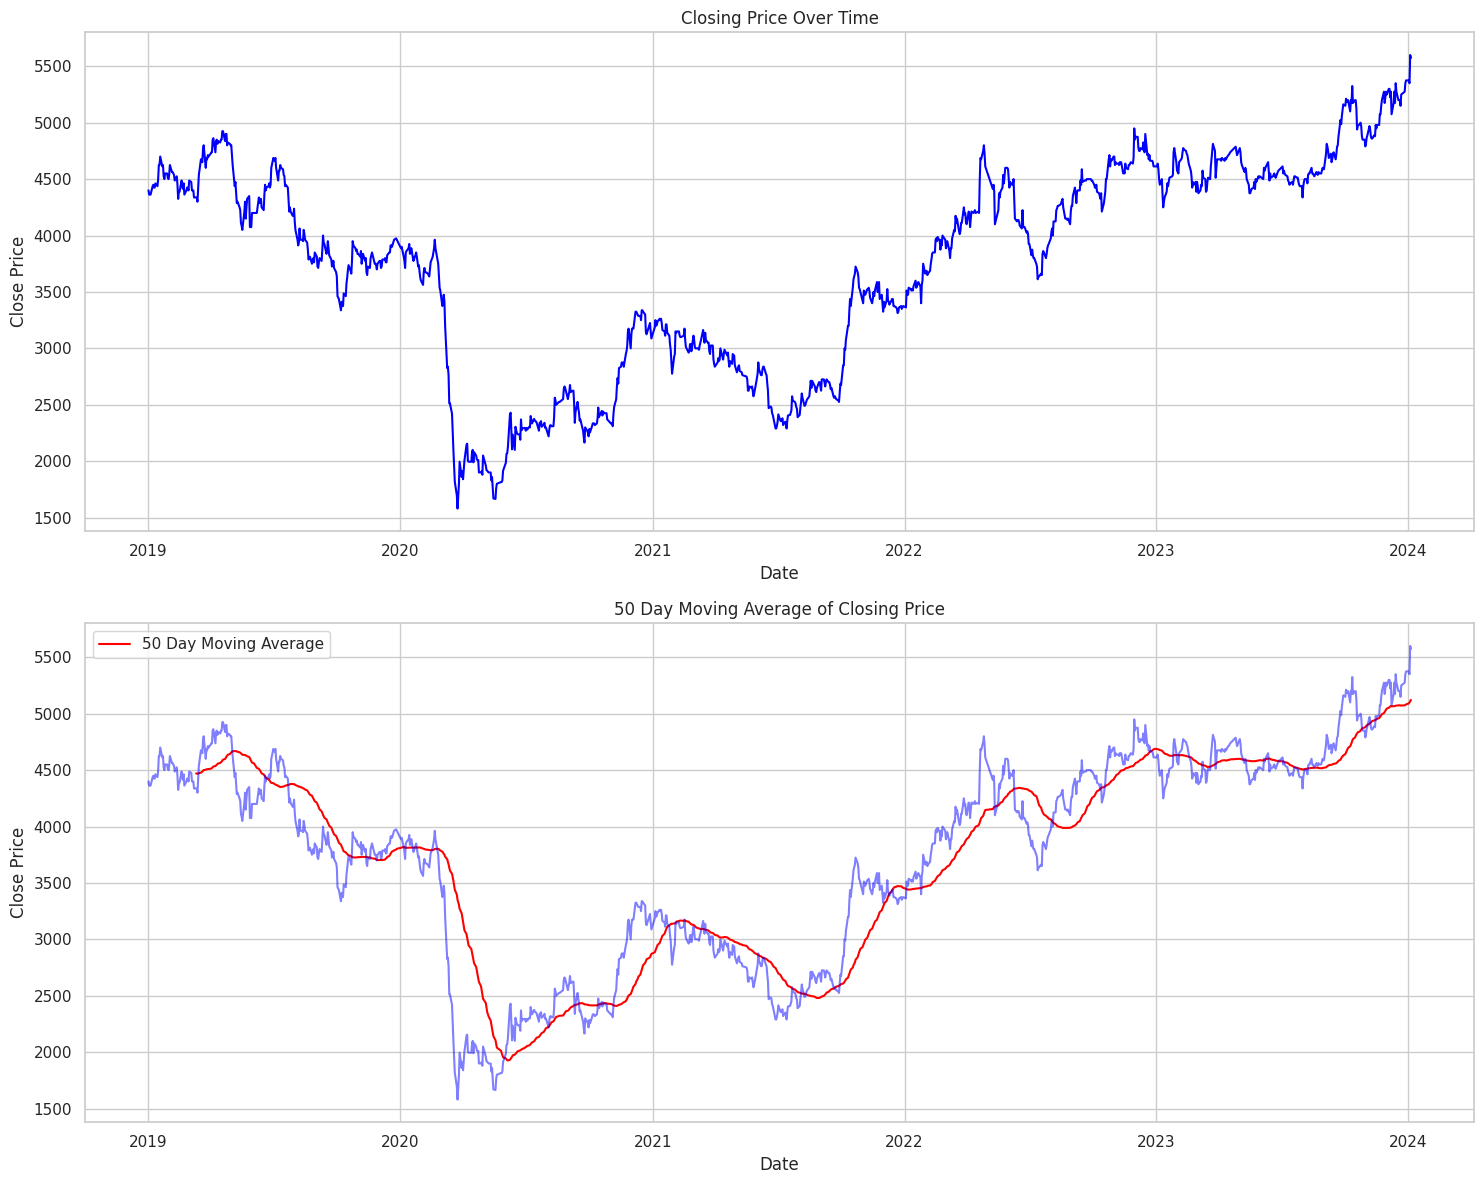

In [65]:
#The Exploratory Data Analysis (EDA) of the Bank Negara Indonesia (BNI) stock data reveals several insights:

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating subplots for different aspects of the stock data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting the Closing Price
axes[0].plot(stock_data.index, stock_data['Close'], color='blue')
axes[0].set_title('Closing Price Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price')

# Plotting the Moving Average (50 days) for Closing Price
rolling_mean = stock_data['Close'].rolling(window=50).mean()
axes[1].plot(stock_data.index, rolling_mean, color='red', label='50 Day Moving Average')
axes[1].plot(stock_data.index, stock_data['Close'], color='blue', alpha=0.5)
axes[1].set_title('50 Day Moving Average of Closing Price')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Closing Price Over Time:** The first plot shows the trend of the
closing price over the given period. This graph is crucial for understanding how the stock's value has changed over time.

**50 Day Moving Average of Closing Price:** The third plot shows the 50-day moving average alongside the actual closing prices. The moving average smoothens short-term fluctuations and helps to identify longer-term trends in the stock price.

In [48]:
# Removing Outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [49]:
# Specify columns to remove outliers from
columns_to_remove_outliers = ['Open', 'High', 'Low', 'Close']

In [50]:
# Remove outliers from specified columns
for col in columns_to_remove_outliers:
    stock_data = remove_outliers_iqr(stock_data, col)

In [51]:
# Regression Analysis
# Preparing data for regression
X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Close']

In [52]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
# Building the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predicting the Test set results
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 850.4813793652846


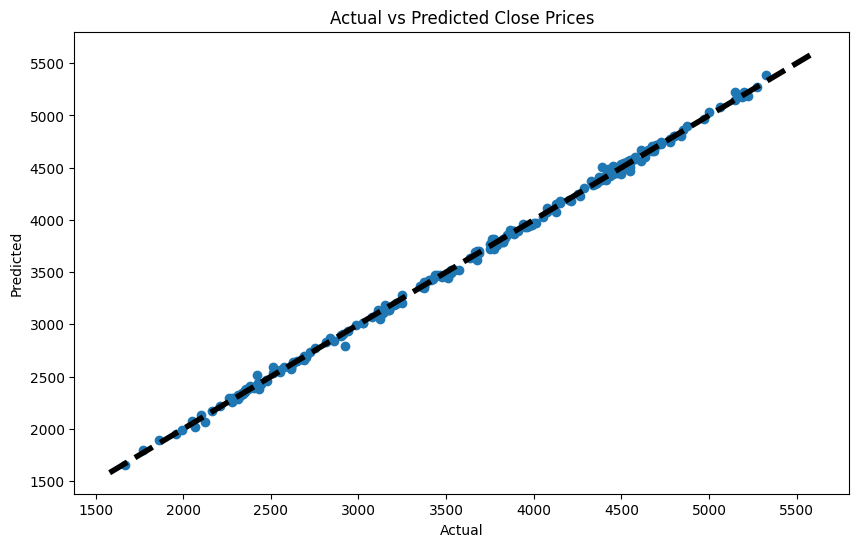

In [56]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Close Prices')
plt.show()

In [58]:
# Calculate the Mean Squared Error (MSE) and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying regression coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Use the latest available data as future data for prediction
future_data = stock_data.iloc[-1][['Open', 'High', 'Low', 'Volume']].values.reshape(1, -1)

# Predictive Analysis: Predicting closing price using the model
predicted_future_close = model.predict(future_data)[0]


# Summary of Exploratory Data Analysis and Regression Analysis Results
summary = f"""
Exploratory Data Analysis and Regression Analysis Summary:

1. Mean Squared Error (MSE): {mse:.2f}
   - MSE indicates the average squared difference between the actual and predicted values.
   - A lower MSE value is generally better. It signifies that the model's predictions are close to the actual values.

2. R-squared value: {r2:.2f}
   - R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
   - It ranges from 0 to 1. A higher R-squared value indicates a better fit for the model.

3. Regression Coefficients:
{coefficients.to_string()}
   - These coefficients represent the relationship between each independent variable and the dependent variable.
   - A positive coefficient indicates a positive effect on the dependent variable, while a negative coefficient indicates a negative effect.

4. Predicted Future Closing Price: {predicted_future_close:.2f}
   - This is the model's prediction for the next day's closing price based on the latest available data.
   - It is an estimate and should be used with caution as stock prices are influenced by many unpredictable factors.

Note: The accuracy of the model depends on the quality of the data and the representativeness of the model. Stock market predictions are inherently uncertain and should be interpreted with caution.
"""

print(summary)



Exploratory Data Analysis and Regression Analysis Summary:

1. Mean Squared Error (MSE): 850.48
   - MSE indicates the average squared difference between the actual and predicted values.
   - A lower MSE value is generally better. It signifies that the model's predictions are close to the actual values.

2. R-squared value: 1.00
   - R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
   - It ranges from 0 to 1. A higher R-squared value indicates a better fit for the model.

3. Regression Coefficients:
         Coefficient
Open   -5.544176e-01
High    8.324928e-01
Low     7.215866e-01
Volume -4.249004e-08
   - These coefficients represent the relationship between each independent variable and the dependent variable.
   - A positive coefficient indicates a positive effect on the dependent variable, while a negative coefficient indicates a negative effect.

4. Predicted Future Closing Price: 5660.35
   - This 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
# Splitting the dataset into training and testing sets
train_data = stock_data[stock_data.index < '2021-01-01']
test_data = stock_data[stock_data.index >= '2021-01-01']

# Preparing the data for regression
X_train = train_data[['Open', 'High', 'Low', 'Volume']]
y_train = train_data['Close']
X_test = test_data[['Open', 'High', 'Low', 'Volume']]
y_test = test_data['Close']


Random Forest MAE: 49.34775815217391
Gradient Boosting MAE: 48.47969642076107


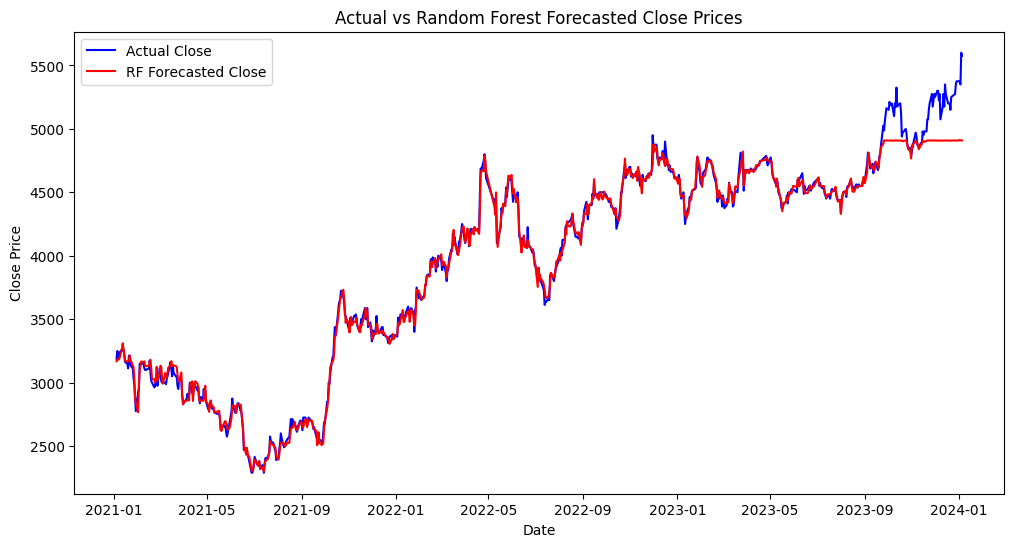

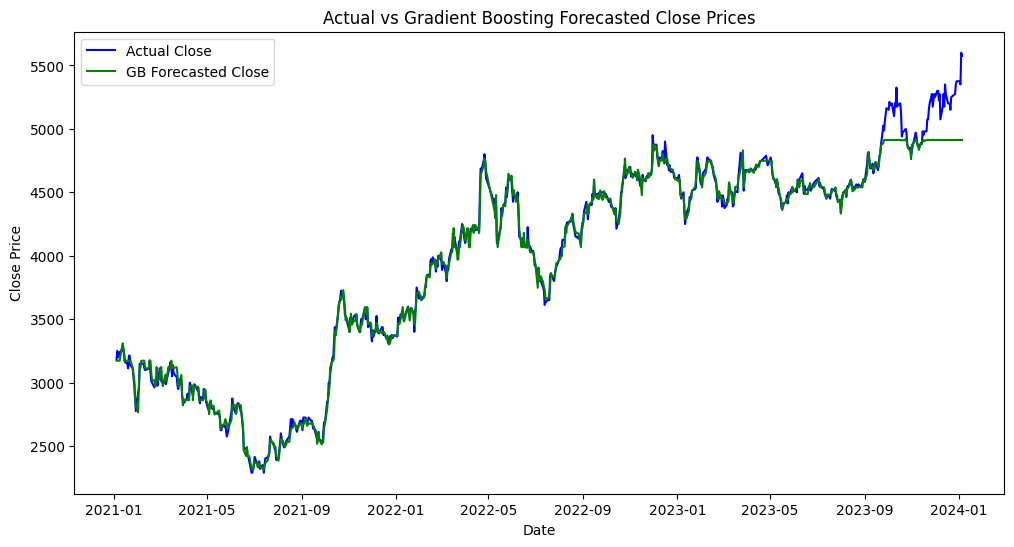

In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)

# Displaying Mean Absolute Error for both models
print(f"Random Forest MAE: {rf_mae}")
print(f"Gradient Boosting MAE: {gb_mae}")

# Plotting the actual vs forecasted values by Random Forest
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Close', color='blue')
plt.plot(test_data.index, rf_pred, label='RF Forecasted Close', color='red')
plt.title('Actual vs Random Forest Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plotting the actual vs forecasted values by Gradient Boosting
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Close', color='blue')
plt.plot(test_data.index, gb_pred, label='GB Forecasted Close', color='green')
plt.title('Actual vs Gradient Boosting Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [69]:

# Building and training the regression models
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Forecasting the stock prices
linear_pred = linear_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE) for the forecast
linear_mae = mean_absolute_error(y_test, linear_pred)

In [70]:
# Displaying Mean Absolute Error for all models
print(f"Linear Regression MAE: {linear_mae}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Gradient Boosting MAE: {gb_mae}")



Linear Regression MAE: 21.52517599292859
Random Forest MAE: 49.34775815217391
Gradient Boosting MAE: 48.47969642076107


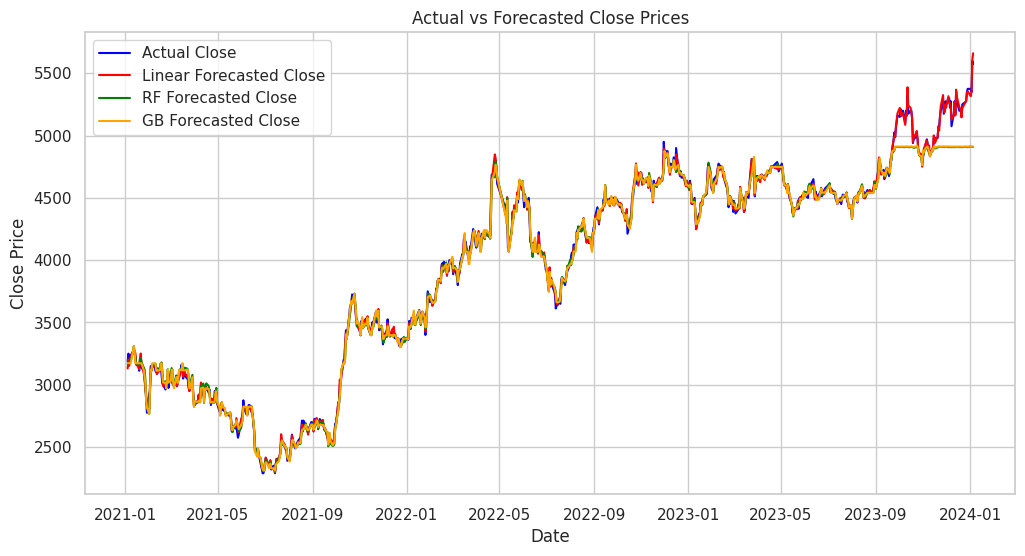

In [68]:
# Plotting the actual vs forecasted values for each model
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual Close', color='blue')
plt.plot(X_test.index, linear_pred, label='Linear Forecasted Close', color='red')
plt.plot(X_test.index, rf_pred, label='RF Forecasted Close', color='green')
plt.plot(X_test.index, gb_pred, label='GB Forecasted Close', color='orange')
plt.title('Actual vs Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()